# WIRELESS SOUND CONTROL

### Abstract:
The project provides the wireless sound control with high-definition audio/video interaction system.The system contains eight devices: an intelligent mobile terminal, an efficient wireless microphone, a fast wireless sensor, the interaction entertainment device, a high-definition sound device, a family cinema sound device, a high-definition television and a mobile vehicle-mounted sound device.The work process of the system is divided into three steps S1) signal source acquisition; S2) central signal processing; and S3) audio /video output. On the basis of a concise frame structure and a hardware platform, with hardware being replaced by software which is given priority, and in a wireless transmission mode, the interaction entertainment system and device can realize the functions of remote information acquisition and high-definition audio/ video information real-time sharing and the like; real-time audio inhibition is achieved through wireless audio acquisition and thus a set of complete intelligentized platform which integrates sounding, control, display and environmental protection into one body is formed.

### Introduction:
Intelligent wireless sound control high resolution audio and video interactive delight system and equipment technical field
The present invention relates to a kind of entertainment systems and equipment, particularly a kind of intelligent wireless sound control high resolution audio and video interactive delight system and equipment.
Nowadays, in the flourish epoch of modern science and technology, the application of Radio Transmission Technology is more and more extensive and along with the develop rapidly of Display Technique and audio-visual technique, in the daily entertainment life of people, be unabling to do without already the various of high definition media information has applied, but people need to public place, to go to enjoy high-quality media KTV amusement conventionally, or cost substantial contribution is bought loaded down with trivial details all kinds of media play and the stereo set of structure.
Image result for hand gesture recognition wikipedia
Gesture recognition is technology that uses sensors to read and interpret hand movements as commands. In the automotive industry, this capability allows drivers and passengers to interact with the vehicle — usually to control the infotainment system without touching any buttons or screens

In [1]:
pip install opencv-pythonNote: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 

In [3]:
import mediapipe as mp

In [4]:
import math
import numpy as np

In [4]:
pip install pycaw

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(
    IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))


print(volume.GetMasterVolumeLevel())
print(volume.GetVolumeRange())
#volume.GetMasterVolumeLevel()
#volume.GetVolumeRange()
#volume.SetMasterVolumeLevel(-20.0, None)

-13.0
(-63.5, 0.0, 0.5)


In [6]:
cap=cv2.VideoCapture(0)
mpDraw=mp.solutions.drawing_utils
mpHands=mp.solutions.hands
hands=mpHands.Hands()

In [ ]:
while True:
    success,img=cap.read()
    imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results=hands.process(imgRGB)
    #print(results.multi_hand_landmarks)
    
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            lmList=[]
            for id, lm in enumerate (handLms.landmark):
                #print(id,ln)
                h,w,c=img.shape
                cx,cy=int(lm.x*w),int(lm.y*h)
                #print(id,cx,cy)
                lmList.append([id,cx,cy])
                print(lmList)
            mpDraw.draw_landmarks(img,handLms,mpHands.HAND_CONNECTIONS)
        if lmList:
            x1,y1=lmList[4][1],lmList[4][2]
            x2,y2=lmList[8][1],lmList[8][2]
            
            cv2.circle(img,(x1,y1),10,(255,0,9),cv2.FILLED)
            cv2.circle(img,(x2,y2),10,(255,0,9),cv2.FILLED)
            cv2.line(img,(x1,y1),(x2,y2),(24,86,127),3)
            
            length=math.hypot(x2-x1,y2-y1)
            print(length)
            
            if length <50:
                x1=(x1+x2)//2
                x2=(y1+y2)//2
                cv2.circle(img,(x1,x2),10,(27,64,134),cv2.FILLED)
        volRange=volume.GetVolumeRange()
        minVol=volRange[0]
        maxVol=volRange[1]
        vol=np.interp(length,[50,300],[minVol,maxVol])
        volBar=np.interp(length,[50,300],[400,150])
        volPer=np.interp(length,[50,300],[0,100])
        
        
        volume.SetMasterVolumeLevel(vol, None)
        cv2.rectangle(img,(50,150),(85,400),(126,58,234),3)
        cv2.rectangle(img,(50,int(volBar)),(85,400),(126,58,234),cv2.FILLED)
        cv2.putText(img,str(int(volPer)),(40,100),cv2.FONT_HERSHEY_COMPLEX,4,(126,58,234))        
            
            
            
            
            
    
            
    
    cv2.imshow("Image",img)
    cv2.waitKey(1)

[[0, 543, 200]]
[[0, 543, 200], [1, 518, 182]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113], [6, 542, 76]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113], [6, 542, 76], [7, 544, 52]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113], [6, 542, 76], [7, 544, 52], [8, 547, 32]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113], [6, 542, 76], [7, 544, 52], [8, 547, 32], [9, 558, 114]]
[[0, 543, 200], [1, 518, 182], [2, 502, 158], [3, 494, 134], [4, 489, 111], [5, 538, 113], [6, 542, 76], [7, 544, 52], [8, 547, 32], [9, 558, 114], [10, 567, 73]]
[[0, 543, 2

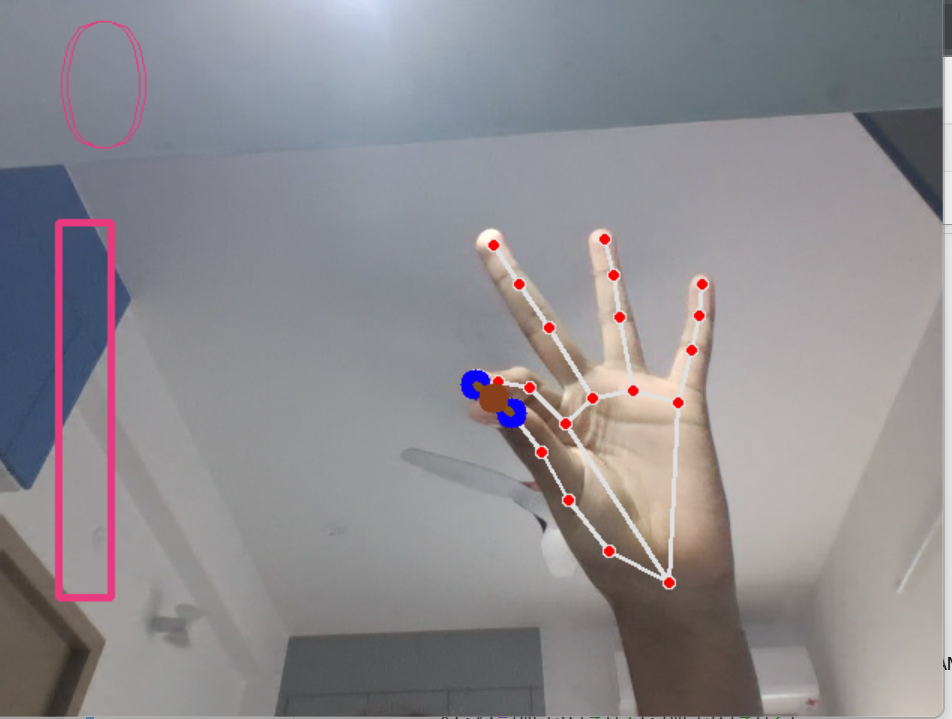

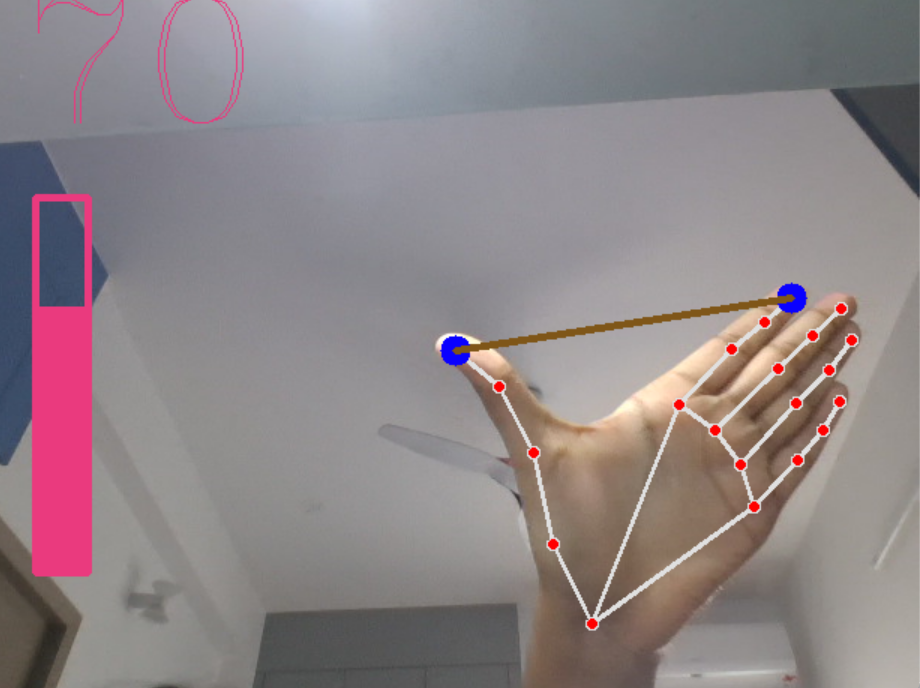

In [ ]:
Conclusion:
Growing technologies has become a crucial part of our society. This wireless sound control using hand gesture recognition is useful to use hand as a actuator to control 